In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
path = Path('/home/ubuntu/data/autopsy/milestone/no_preprocessing')

In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Homicide,\n.MICRO.\nHEART: acute hemorrhages in the epi...,False
1,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
2,Homicide,\n.MICRO.\nLIVER: Moderate macrovesicular stea...,False
3,Homicide,\n.MICRO.\nHeart:\nNo significant histopatholo...,False
4,Homicide,\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirear...,False


In [34]:
df.tail()

,label,text,is_valid
3037,Suicide,\n.MICRO.\nNONE\n.LOCATIONExtremity\n.INJURYBl...,False
3038,Suicide,\n.MICRO.\nHeart: Negative\n\nLungs: Pulmonary...,False
3039,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
3040,Suicide,\n.MICRO.\nHEART: There is patchy perivascula...,False
3041,Homicide,"\n.MICRO.\nHeart: No significant, histopatholo...",False


In [5]:
df['text'][1]

'\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.'

In [31]:
df['text'][0]

'\n.MICRO.\nHEART: acute hemorrhages in the epicardial adipose tissue, otherwise, no significant histopathologic diagnosis\n\nLUNG: patchy intra-alveolar macrophages, scattered foci of intra-alveolar erythrocytes\n\nLIVER: bridging fibrosis/early cirrhosis with prominent lobular steatosis and mild chronic periportal inflammation; focal interface hepatitis and bile ductular reaction\n\nKIDNEY: no significant histopathologic diagnosis\n\nESOPHAGUS: intact squamous mucosa with submucosal and intramuscular acute hemorrhages\n\nTHYROID: acute hemorrhage of the soft tissue adjacent to the thyroid gland, otherwise no significant histopathologic diagnosis\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nA 3 x 1.5 cm, irregular laceration is on the left frontal scalp, with an irregular marginal abrasion extending up to 0.6 cm from the edge of the wound. A 7.5 x 0.3 cm linear, horizontal laceration is on the central frontal scalp, with an irregular pink marginal abrasion extending up to 0.5 c

In [33]:
df['text'][2]

"\n.MICRO.\nLIVER: Moderate macrovesicular steatosis\n\nBRAIN, LUNGS, KIDNEYS, HEART: no significant histopathology\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nGUNSHOT WOUND OF BACK/TRUNK, INDETERMINATE RANGE:\n\nEntrance:\n\nOn the left mid back, 7.5 cm left of posterior midline and 50 cm below the top of the head, is an entrance gunshot wound consisting of a 0.8 x 0.8 cm round defect with 0.2 cm wide circumferential marginal abrasion. Soot, unburned gunpowder particles and gunpowder stippling are not visible on the skin surrounding the wound.\n\nPath:\n\nThe hemorrhagic wound track sequentially perforates the skin and subcutaneous tissues of the left mid back, the tenth thoracic vertebral body (T10), the diaphragm, the right lobe of the liver, the diaphragm, the lower lobe of the right lung, and the sixth lateral right intercostal space, and penetrates the soft tissue of the right flank where the missile comes to rest. \n\nAssociated injuries include scant hemoperitoneum.\

In [38]:
df['text'][4]

"\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nNOTE: The wounds are described in an arbitrary order which does not imply sequence or severity.  Wound tracks are described for a body at rest in the anatomic position.)\n\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the upper chest, centered approximately 14 inches below the top of the head and 3 inches right of anterior midline, is an entrance gunshot wound, consisting of a 3/8 inch round defect with circumferential, 1/8 to 1/4 inch, dark red marginal abrasion and a 1/8 inch rim of purple ecchymosis extending from the wound edges. No soot, stippling, or unburned gunpowder particles are visible on the skin surrounding this wound.\n\nExit: None.\n\nTerminus: The wound track terminates in the subcutaneous tissue of the upper back, centered approximately 10 inches below the top of the head and 2 inches right of posterior midline.\n\nPath: The hemorrhagic wound track involves the skin, subcutane

In [35]:
df['text'][3038]

'\n.MICRO.\nHeart: Negative\n\nLungs: Pulmonary edema\n\nLiver: Negative\n\nKidney: Negative\n\nBrain: Intraparenchymal and subarachnoid hemorrhage of cerebellum \n.LOCATIONHead\n.INJURYFirearm injury.\n.INJURYDESC.\nGunshot wound of head:\n\nEntrance: on the right temporal scalp, is a 2.5 x 1.5 entrance gunshot wound with a circumferential marginal abrasion and discontinuous muzzle imprint. Soot is present on the wound margin.\n\nPath: right temporal skull (soot on outer table, internal beveling), right temporal lobe, basal ganglia, left temporal lobe\n\nAssociated injuries: right periorbital contusion and medial canthus laceration, extensive fragmentation of base of brain, numerous skull fractures including bilateral anterior and middle cranial fossae, diffuse subarchnoid and thin bilateral subdural hemorrhage\n\nNo Exit:\n\nRecovery:25.6 grain deformed jacketed missile recovered from left occipital lobe\n\nTrajectory: right to left and backward\n\nHands: negative'

In [36]:
df['text'][3040]

'\n.MICRO.\nHEART:  There is patchy perivascular fibrosis.  Some myocyte nuclei are enlarged and irregular.\n\nLUNGS:  Patchy intra-alveolar edema, congestion.\n\nKIDNEY:  There is some thickening of artery muscular walls.  There is a rare globally sclerotic glomeruli.\n\nLIVER:  Periortal fibrosis is bridging and contains inflammation consisting predominantly of lymphocytes.  Steatosis is moderate to severe.\n\nBRAIN:  No significant histopathologic diagnosis.\n.LOCATIONExtremity\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the right posterior hand is a 0.8 cm linear oblique orange red superficial abrasion.  The left lateral hand has a 1.0 cm linear oblique orange red superficial abrasion.'

In [37]:
df['text'][3041]

'\n.MICRO.\nHeart: No significant, histopathologic findings\n\nLungs: Atelectasis; focal collections of brown-pigmented, intra-alveolar macrophages\n\nKidneys: No significant, histopathologic findings\n\nLiver: Mild to moderate, predominantly lymphocytic, portal inflammation and mild, fibrous, portal expansion \n\nHippocampus: No significant, histopathologic findings\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDESC.\nRIGHT UPPER EXTREMITY\nThere are red to orange, linear to irregular abrasions in an 18 x 4.5 cm area of the right lateral arm and right posterior forearm. \n\nThere is a 0.3 x 0.2 cm, red abrasion of the dorsal right hand, in the region of the fifth distal metacarpal.\n\nThere is a 7 x 6 cm cluster of purple contusions of the anterior right shoulder. \n\n\nLEFT UPPER EXTREMITY\nThere are scattered, red, 0.1 cm to 0.4 cm in greatest dimension abrasions of the dorsal left hand.\n\n\nLEFT LOWER EXTREMITY\nThere is a 5 x 3.5 cm cluster of red abrasions of the left ante

In [6]:
bs=32

In [7]:
data_lm = TextLMDataBunch.from_csv(path, 'data.csv')

In [8]:
data_lm.show_batch()

idx,text
0,"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup perforating xxup gunshot xxup wound xxup of xxup head \n\n\n xxup entrance \n\n xxmaj location : xxmaj right parietal scalp , 3 cm from the top of the head and 5 cm from the back of the head \n\n xxmaj defect : 1.1 cm round defect from which radiates a"
1,a 1.0 x 0.6 cm oval gunshot wound entrance with a 0.5 cm medial left sided abrasion . \n\n xxmaj the wound is centered just to the right of midline and 103 cm above the right heel . \n\n xxmaj subsequent autopsy reveals a penetrating gunshot wound of the buttock and hip . xxmaj the bullet passes superficially through the soft tissue of the right buttock and hip and comes
2,of pigmented macrophages within alveoli . \n\n xxmaj liver : \n xxmaj moderate chronic portal inflammation and increase in portal fibrosis with focal portal bridging ; mild macrovesicular steatosis . \n\n xxmaj kidney : \n xxmaj one globally sclerotic glomerulus . \n\n xxmaj right hippocampus : \n xxmaj no significant histopathologic findings . \n .locationchest \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup shotgun xxup wound xxup of
3,"of the right shoulder , is an exit gunshot wound consisting of a 1.5 cm ( reapproximated ) laceration without marginal abrasion . \n\n xxmaj trajectory : \n\n xxmaj the wound track travels from the decedentâs left to right , back to front , and upward . \n\n xxmaj clothing : \n\n xxmaj on the back and front area of the sweatshirt and undershirt and possibly corresponding to the entrance"
4,irregular . \n\n xxup lungs : xxmaj postmortem changes and intra - alveolar edema . \n\n xxup liver : xxmaj periportal inflammation consisting predominantly of lymphocytes . xxmaj severe diffuse steatosis . \n\n xxup kidney : xxmaj tubular autolysis and no significant histopathologic diagnosis . \n\n xxup brain : xxmaj no significant histopathologic diagnosis . \n .locationneck \n .injuryhanging . \n xxup .injurydesc . \n a yellow strap in three


In [9]:
#learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, qrnn=True)
learn = language_model_learner(data_lm, qrnn=True)

In [10]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.359633,2.152133,0.543387


In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.188012,2.116117,0.548402
2,2.093144,2.027139,0.560236
3,1.986039,1.905764,0.577245
4,1.895353,1.808617,0.592924
5,1.843608,1.746729,0.602810
6,1.763032,1.705305,0.609230
7,1.662612,1.676907,0.613840
8,1.658068,1.661589,0.616477
9,1.634334,1.654842,0.617487
10,1.609407,1.653789,0.617847


In [13]:
learn.save_encoder('fine_tuned_enc_qrnn')

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', vocab=data_lm.train_ds.vocab, bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj no significant histopathologic abnormalities \n\n xxmaj lungs : xxmaj the lungs show areas of atelectasis , scattered intra - alveolar macrophages , mildly enlarged alveoli with incomplete septae , and rare interstitial carbon pigment . \n\n xxmaj liver : xxmaj mild mixed inflammation is confined to the portal tracts . \n\n xxmaj kidney : xxmaj no significant histopathologic abnormalities \n\n",Homicide
xxbos \n xxup .micro . \n xxmaj lung : xxmaj atelectasis . xxmaj foci of intralveolar erythrocytes . \n\n xxmaj heart : xxmaj left ventricular myocyte hypertrophy . \n\n xxmaj liver : xxmaj severe steatosis . xxmaj multifocal intralobular chronic inflammation . \n\n xxmaj kidney : xxmaj occasional sclerotic glomeruli . \n\n xxmaj brain : xxmaj no significant histopathologic diagnosis . \n .locationextremity \n .injuryother . \n xxup .injurydesc .,Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup penetrating xxup gunshot xxup wound xxup of xxup head ( a ) \n\n xxup entrance : xxmaj on the left side of the scalp , centered 4 centimeters below the top of the head and 6 centimeters left of the anterior midline , is an entrance gunshot wound consisting of",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj focal lymphocytic infiltrate at the epicardial surface and edge of myocardium \n\n xxmaj lungs : xxmaj pigmented macrophages within occasional alveoli \n\n xxmaj liver : xxmaj occasional portals with mild , predominantly lymphocytic inflammation \n\n xxmaj kidney : xxmaj no significant histopathologic findings \n .locationhead and neck \n .injurysharp injury . \n xxup .injurydesc . \n xxup incised xxup wound",Homicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True)
learn.load_encoder('fine_tuned_enc_qrnn')
learn.freeze()

In [17]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.616710,0.442835,0.825944


In [18]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.587787,0.439223,0.848933


In [19]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.577965,0.429380,0.840723


In [20]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.529344,0.366511,0.866995


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.489869,0.309701,0.891626
2,0.461150,0.304651,0.891626


In [22]:
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.478571,0.304214,0.898194
2,0.445100,0.288667,0.903120
3,0.463270,0.301161,0.916256
4,0.496135,0.284578,0.916256
5,0.517894,0.276558,0.919540
6,0.472275,0.260607,0.889984
7,0.466141,0.236446,0.927750
8,0.478737,0.245028,0.921182
9,0.429510,0.244637,0.912972
10,0.380971,0.232045,0.911330


In [23]:
from fastai.vision import *

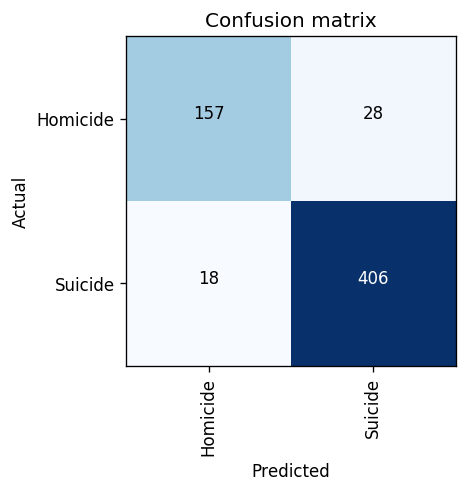

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

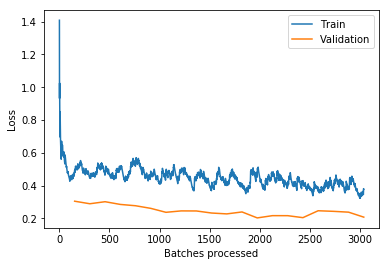

In [25]:
learn.recorder.plot_losses()

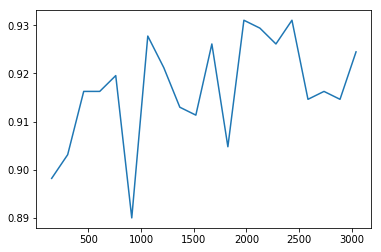

In [26]:
learn.recorder.plot_metrics()

In [41]:
learn.predict('\n.MICRO.\nHEART: acute hemorrhages in the epicardial adipose tissue, otherwise, no significant histopathologic diagnosis\n\nLUNG: patchy intra-alveolar macrophages, scattered foci of intra-alveolar erythrocytes\n\nLIVER: bridging fibrosis/early cirrhosis with prominent lobular steatosis and mild chronic periportal inflammation; focal interface hepatitis and bile ductular reaction\n\nKIDNEY: no significant histopathologic diagnosis\n\nESOPHAGUS: intact squamous mucosa with submucosal and intramuscular acute hemorrhages\n\nTHYROID: acute hemorrhage of the soft tissue adjacent to the thyroid gland, otherwise no significant histopathologic diagnosis\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nA 3 x 1.5 cm, irregular laceration is on the left frontal scalp, with an irregular marginal abrasion extending up to 0.6 cm from the edge of the wound. A 7.5 x 0.3 cm linear, horizontal laceration is on the central frontal scalp, with an irregular pink marginal abrasion extending up to 0.5 cm from the edge of the wound. A 7x1 cm irregular laceration is oriented horizontally on the left parietal scalp. The left ear has a perforating laceration on the superior helix up to 2.5 cm and associated with multiple red abrasions. A 6 x 3 cm, blue-purple, right periorbital contusion is associated with soft tissue edema. Left periorbial edema is without extensive ecchymosis. A 4 x 2 cm red, superficial abrasion is on the right cheek. A right, lateral scleral hemorrhage is present. Perioral red abrasions measure up to 1.8 cm. Facial fractures are palpable. \n\nSubgaleal and subscalpular hemorrhages are most extensive on the left frontotemporal scalp and calvarium. A linear skull fracture extends across the temporal and parietal bones. The anterior cranial fossae are fractured with mild displacement of the left orbital roof. Approximatly 50 mL of clotted epidural hemorrhage overlies the left parietal dura. A 10 mL subdural hemorrhage with clot is present over the left temporal lobe. Mild scattered subarachnoid hemorrhage is evident. Please see the separate neuropathology report for additional information.\n\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDESC.\nUpper extremities\n\nMultiple linear red abrasions are on the right arm and forearm, ranging from 0.5 to 4.5 cm. A 7 x 8 cm blue-purple contusion with central blanching is on the knuckles of the right hand. A 0.5 cm, linear red laceration with superficial skin avulsion is on the right first finger. The left hand and knuckles are edematous, with a faint 8 x 7 cm blue contusion. A 2.3 cm linear laceration is on the medial aspect of the left fifth digit. \n\nLower extremities\n\nMultiple blue-purple and brown contusions are on the anterior lower extremities, ranging from 2 to 5 cm. Linear red abrasions ranging from 0.5 to 3 cm are on the bilateral anterior lower extremities. A 9 x 10 cm faint blue-green contusion is on the left posterior thigh. A 6 x 3 cm faint blue-green contusion is on the left posterior lower leg. Linear horizontal superficial abrasions are on the posterior leg, ranging from 1.5-12 cm in length. Multiple horizontal linear, superficial, red abrasions are on right posterior and medial leg, ranging from 1.5-2 cm. A 2.5 x 1 cm laceration with abrasion is on the medial right ankle. \n\n.LOCATIONTrunk\n.INJURYBlunt injury.\n.INJURYDESC.\nMultiple red linear and curvilinear abrasions are haphazardly arranged on the right chest and abdomen ranging from 0.5-1.3 cm. A 2 x 3 cm blue contusion is on the left abdomen.  Multiple additional red, punctate and linear abrasions ranging from 0.1-1.5 cm are on the right back, shoulder, and flank, covering up to 25% of the posterior trunk surface area. On the left flank are two red contusions, 6 x 2 cm and 5.5 x 2 cm, with central areas of blanching approximately 2.5 x 1 cm. Associated red abrasions within the contusion on the left flank measure up to 1 cm.  An 12 x 2 cm discontinuous oval contusion with central blanching spans the buttocks at the sacrum. A 2 x 1 cm, blue-purple abrasion is associated with the previously described contusion and is on the left upper buttock. \n\n\n\n.LOCATIONNeck\n.INJURYBlunt injury.\n.INJURYDESC.\nThe sternothyroid and sternohyoid muscles contain areas of patchy hemorrhage in the anterior neck. The left paravertebral muscles are hemorrhagic. The left hyoid bone and left superior horn of the thyroid cartilage are fractured. Hemorrhages in the soft tissue surrounding the esophagus and thyroid gland are patchy and scattered.')

(Category Homicide, tensor(0), tensor([0.9490, 0.0510]))

In [40]:
learn.predict('This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,This is a really long autopsy report, maybe the model is overfitting to the length of the text,')

(Category Suicide, tensor(1), tensor([0.2332, 0.7668]))

In [42]:
learn.predict('\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.')

(Category Suicide, tensor(1), tensor([0.0018, 0.9982]))